In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
import wrangle_cluster
import os
import acquire

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Acquire (acquire.py)

Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = wrangle_cluster.get_zillow()

In [3]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
id,,,,,,,,,,,,,,,,,,,,,
1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


## 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [12]:
wrangle_cluster.summarize(df)




Dataframe head: 
|      id |   parcelid |   airconditioningtypeid |   architecturalstyletypeid |   basementsqft |   bathroomcnt |   bedroomcnt |   buildingclasstypeid |   buildingqualitytypeid |   calculatedbathnbr |   decktypeid |   finishedfloor1squarefeet |   calculatedfinishedsquarefeet |   finishedsquarefeet12 |   finishedsquarefeet13 |   finishedsquarefeet15 |   finishedsquarefeet50 |   finishedsquarefeet6 |   fips |   fireplacecnt |   fullbathcnt |   garagecarcnt |   garagetotalsqft |   hashottuborspa |   heatingorsystemtypeid |    latitude |    longitude |   lotsizesquarefeet |   poolcnt |   poolsizesum |   pooltypeid10 |   pooltypeid2 |   pooltypeid7 |   propertycountylandusecode |   propertylandusetypeid | propertyzoningdesc   |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidneighborhood |   regionidzip |   roomcnt |   storytypeid |   threequarterbathnbr |   typeconstructiontypeid |   unitcnt |   yardbuildingsqft17 |   yardbuildingsqft26 |   yearbu

|       |        parcelid |   airconditioningtypeid |   architecturalstyletypeid |   basementsqft |   bathroomcnt |   bedroomcnt |   buildingclasstypeid |   buildingqualitytypeid |   calculatedbathnbr |   decktypeid |   finishedfloor1squarefeet |   calculatedfinishedsquarefeet |   finishedsquarefeet12 |   finishedsquarefeet13 |   finishedsquarefeet15 |   finishedsquarefeet50 |   finishedsquarefeet6 |       fips |   fireplacecnt |   fullbathcnt |   garagecarcnt |   garagetotalsqft |   hashottuborspa |   heatingorsystemtypeid |         latitude |        longitude |   lotsizesquarefeet |   poolcnt |   poolsizesum |   pooltypeid10 |   pooltypeid2 |   pooltypeid7 |   propertylandusetypeid |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidneighborhood |   regionidzip |     roomcnt |   storytypeid |   threequarterbathnbr |   typeconstructiontypeid |     unitcnt |   yardbuildingsqft17 |   yardbuildingsqft26 |   yearbuilt |   numberofstories |   fireplaceflag |   struct

(60370272.019999996, 60444919.091]    50551
(60444919.091, 60518827.081]              0
(60518827.081, 60592735.071]          20593
(60592735.071, 60666643.061]              0
(60666643.061, 60740551.052]              0
(60740551.052, 60814459.042]              0
(60814459.042, 60888367.032]              0
(60888367.032, 60962275.022]              0
(60962275.022, 61036183.012]              0
(61036183.012, 61110091.002]           6237
Name: rawcensustractandblock, dtype: int64
(3097.9339999999997, 42797.5]    55659
(42797.5, 82104.0]               18118
(82104.0, 121410.5]               1053
(121410.5, 160717.0]                 0
(160717.0, 200023.5]                 0
(200023.5, 239330.0]                 0
(239330.0, 278636.5]                24
(278636.5, 317943.0]                 0
(317943.0, 357249.5]                 0
(357249.5, 396556.0]              1056
Name: regionidcity, dtype: int64
(1284.184, 1467.5]    20593
(1467.5, 1649.0]          0
(1649.0, 1830.5]          0
(1830.5, 2

   num_cols_missing percent_cols_missing     id
0                23    34.32835820895522      2
1                24    35.82089552238806     13
2                25     37.3134328358209     24
3                26    38.80597014925373     65
4                27   40.298507462686565    316
5                28     41.7910447761194    455
6                29    43.28358208955223   5270
7                30   44.776119402985074   3455
8                31    46.26865671641791   9891
9                32    47.76119402985074  12579
10               33    49.25373134328358  14782
11               34    50.74626865671642  13327
12               35    52.23880597014925   5148
13               36    53.73134328358209   5775
14               37   55.223880597014926   3620
15               38    56.71641791044776   1925
16               39     58.2089552238806    285
17               40    59.70149253731343    230
18               41    61.19402985074627     29
19               42    62.68656716417911

## 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

In [9]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [10]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
parcelid,0,0.000000
airconditioningtypeid,52428,67.753066
architecturalstyletypeid,77175,99.733785
basementsqft,77331,99.935385
bathroomcnt,0,0.000000
...,...,...
buildingclassdesc,77366,99.980615
heatingorsystemdesc,27941,36.108347
propertylandusedesc,0,0.000000
storydesc,77331,99.935385


#### Takeaways:
- varied number of null values
- drop columns that have more than 50% missing values

## 3.1. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [13]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index().set_index('num_cols_missing')
    return rows_missing

In [14]:
nulls_by_row(df)

,percent_cols_missing,id
num_cols_missing,,
23,34.32835820895522,2
24,35.82089552238806,13
25,37.3134328358209,24
26,38.80597014925373,65
27,40.298507462686565,316
28,41.7910447761194,455
29,43.28358208955223,5270
30,44.776119402985074,3455
31,46.26865671641791,9891


#### Takeaways:
- 5775 rows that are missing 36 columns
- drop rows that have more than 75% missing values

In [15]:
#summarize data in the df
#head, info, describe, value counts, nulls

def summarize(df):
    '''
    this function will take in a single argument (a pandas df) 
    output to console various statistics on said dataframe, including:
    #.head()
    #.info()
    #.describe()
    #.value_counts()
    #observation of nulls in the dataframe
    '''
    #print head
    print('=================================================')
    print('Dataframe head: ')
    print(df.head(3))
    
    #print info
    print('=================================================')
    print('Dataframe info: ')
    print(df.info())
    
    #print descriptive stats
    print('=================================================')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] # not an object
    cat_cols = [col for col in df.columns if col not in num_cols]
    
    #print value counts
    print('=================================================')
    print('Dataframe value counts: ')
    for col in df. columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort = False))
    
    #print nulls by column
    print('=================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    
    #print nulls by row
    
    print('=================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=================================================')

In [16]:
summarize(df)

Dataframe head: 
         parcelid  airconditioningtypeid  architecturalstyletypeid  \
id                                                                   
1727539  14297519                    NaN                       NaN   
1387261  17052889                    NaN                       NaN   
11677    14186244                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
id                                                                    
1727539           NaN          3.5         4.0                  NaN   
1387261           NaN          1.0         2.0                  NaN   
11677             NaN          2.0         3.0                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
id                                                             ...   
1727539                    NaN                3.5         NaN  ...   
1387261                    NaN                1.0         NaN  ...

(10554877.537, 26409601.2]    77350
(26409601.2, 42107347.4]          0
(42107347.4, 57805093.6]          0
(57805093.6, 73502839.8]          0
(73502839.8, 89200586.0]          1
(89200586.0, 104898332.2]         1
(104898332.2, 120596078.4]        0
(120596078.4, 136293824.6]        0
(136293824.6, 151991570.8]        0
(151991570.8, 167689317.0]       29
Name: parcelid, dtype: int64
(0.987, 2.2]    23133
(2.2, 3.4]          0
(3.4, 4.6]          0
(4.6, 5.8]        167
(5.8, 7.0]          0
(7.0, 8.2]          0
(8.2, 9.4]         26
(9.4, 10.6]         0
(10.6, 11.8]       53
(11.8, 13.0]     1574
Name: airconditioningtypeid, dtype: int64
(1.9800000000000002, 3.9]      8
(3.9, 5.8]                     0
(5.8, 7.7]                   172
(7.7, 9.6]                    19
(9.6, 11.5]                    0
(11.5, 13.4]                   0
(13.4, 15.3]                   0
(15.3, 17.2]                   0
(17.2, 19.1]                   0
(19.1, 21.0]                   7
Name: architectural

(1284.184, 1467.5]    20593
(1467.5, 1649.0]          0
(1649.0, 1830.5]          0
(1830.5, 2012.0]          0
(2012.0, 2193.5]       6237
(2193.5, 2375.0]          0
(2375.0, 2556.5]          0
(2556.5, 2738.0]          0
(2738.0, 2919.5]          0
(2919.5, 3101.0]      50551
Name: regionidcounty, dtype: int64
(6194.784, 82673.5]     11546
(82673.5, 158395.0]      4585
(158395.0, 234116.5]       43
(234116.5, 309838.0]    11551
(309838.0, 385559.5]       77
(385559.5, 461281.0]     1948
(461281.0, 537002.5]        0
(537002.5, 612724.0]        0
(612724.0, 688445.5]       66
(688445.5, 764167.0]     1074
Name: regionidneighborhood, dtype: int64
(95678.306, 126351.3]    77319
(126351.3, 156720.6]         0
(156720.6, 187089.9]         0
(187089.9, 217459.2]         0
(217459.2, 247828.5]         0
(247828.5, 278197.8]         0
(278197.8, 308567.1]         0
(308567.1, 338936.4]         0
(338936.4, 369305.7]         0
(369305.7, 399675.0]        12
Name: regionidzip, dtype: int64
(-

## Prepare

## 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [17]:
# Restrict df to only properties that meet single use criteria
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]

# Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]


In [18]:
summarize(df)

Dataframe head: 
         parcelid  airconditioningtypeid  architecturalstyletypeid  \
id                                                                   
1727539  14297519                    NaN                       NaN   
1387261  17052889                    NaN                       NaN   
11677    14186244                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
id                                                                    
1727539           NaN          3.5         4.0                  NaN   
1387261           NaN          1.0         2.0                  NaN   
11677             NaN          2.0         3.0                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
id                                                             ...   
1727539                    NaN                3.5         NaN  ...   
1387261                    NaN                1.0         NaN  ...

ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

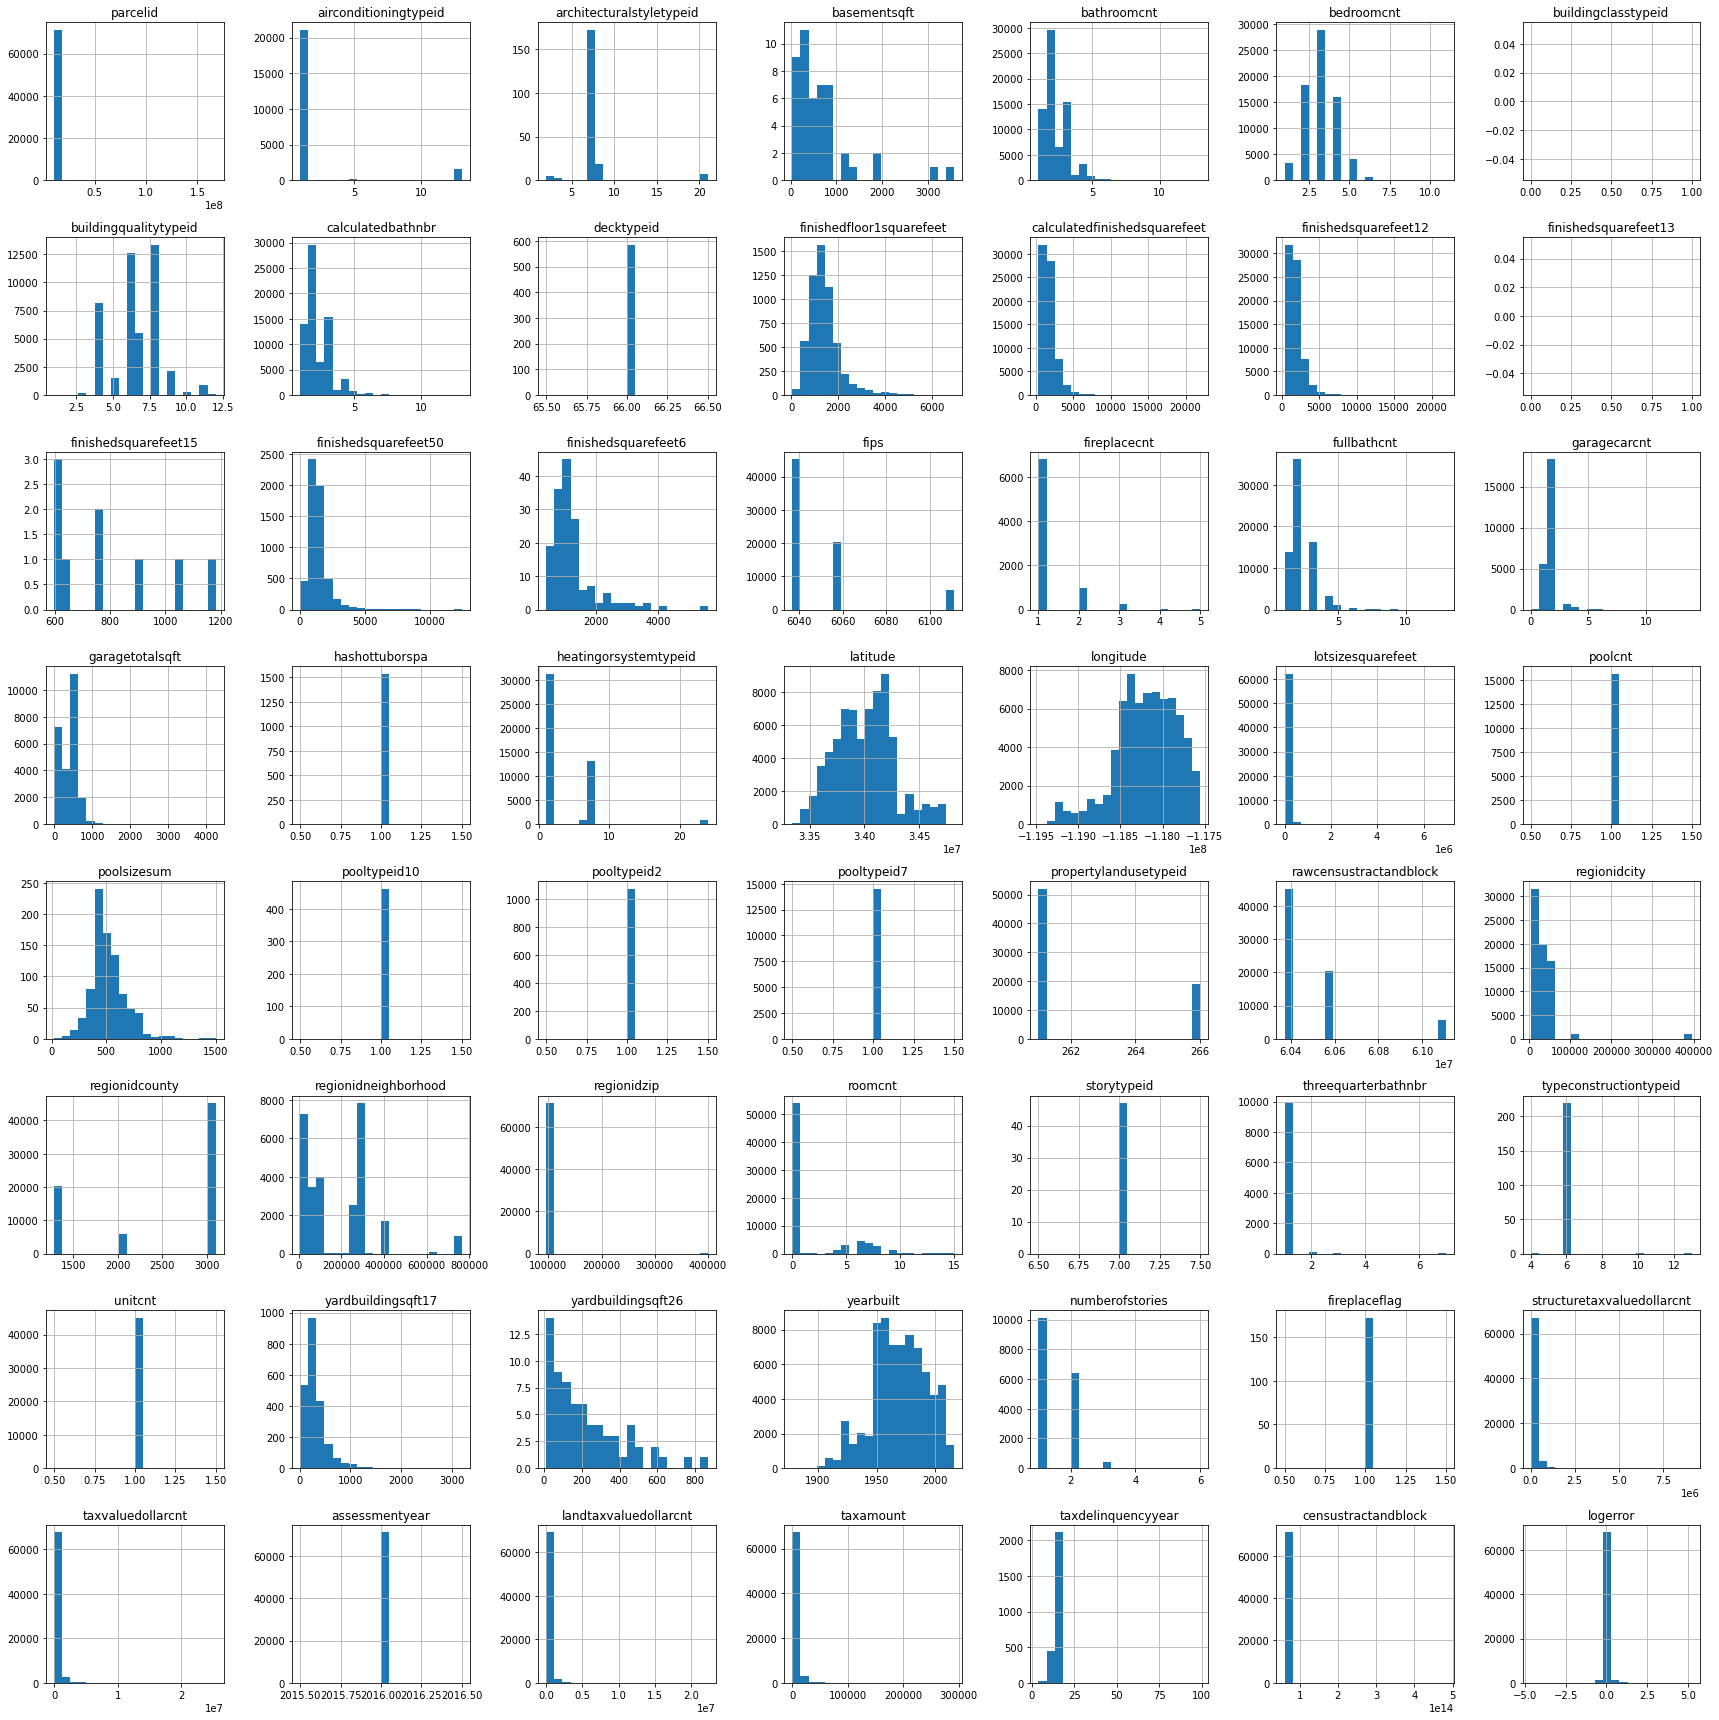

In [19]:
# visualize my numerical data types

df.hist(figsize=(24,24), bins=20)
plt.tight_layout()
plt.show()

## 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [20]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
# function that will drop rows or columns based on the percent of values that are missing:\
# handle_missing_values(df, prop_required_column, prop_required_row
    threshold = int(round(prop_required_column*len(df.index),0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [21]:
# Handle missing values i.e. drop columns and rows based on a threshold
df = handle_missing_values(df)
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
id,,,,,,,,,,,,,,,,,,,,,
1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,NaN,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential
1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,NaN,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential
11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,NaN,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential
2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,2.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,2.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium


## 3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [22]:
# Add column for counties
df['county'] = df['fips'].apply(
        lambda x: 'Los Angeles' if x == 6037\
        else 'Orange' if x == 6059\
        else 'Ventura')

# drop unnecessary columns
dropcols = ['parcelid',
         'calculatedbathnbr',
         'finishedsquarefeet12',
         'fullbathcnt',
         'heatingorsystemtypeid',
         'propertycountylandusecode',
         'propertylandusetypeid',
         'propertyzoningdesc',
         'censustractandblock',
         'propertylandusedesc']



# replace nulls in unitcnt with 1
df.unitcnt.fillna(1, inplace = True)

# assume that since this is Southern CA, null means 'None' for heating system
df.heatingorsystemdesc.fillna('None', inplace = True)

# replace nulls with median values for select columns
df.lotsizesquarefeet.fillna(7313, inplace = True)
df.buildingqualitytypeid.fillna(6.0, inplace = True)

# Columns to look for outliers
df = df[df.taxvaluedollarcnt < 5_000_000]
df = df[df.calculatedfinishedsquarefeet < 8000]

# Just to be sure we caught all nulls, drop them here
df = df.dropna()

def remove_columns(df, cols_to_remove):
#remove columns not needed
    df = df.drop(columns=cols_to_remove)
    return df

In [23]:
df = remove_columns(df, dropcols)

In [24]:
df.shape

(43119, 24)

## Mall Customers
### notebook
#### 1. Acquire data from mall_customers.customers in mysql database.

In [25]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [26]:
mall_df = get_mallcustomer_data()

In [27]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## 2. Summarize data (include distributions and descriptive statistics).

In [28]:
summarize(mall_df)

Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.0

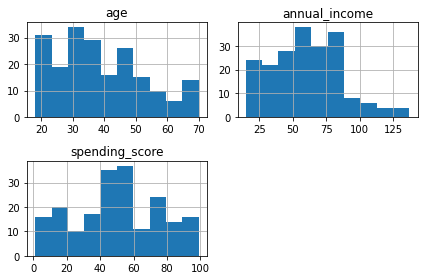

In [29]:
mall_df.hist()
plt.tight_layout()
plt.show()

## 3. Detect outliers using IQR.

In [30]:
def outlier_function(df, cols, k):
# function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df.annual_income.quantile(0.25)
        q3 = df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [31]:
mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)

In [32]:
summarize(mall_df)

Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 198
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          198 non-null    object
 1   age             198 non-null    int64 
 2   annual_income   198 non-null    int64 
 3   spending_score  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  198.000000     198.000000      198.000000
mean    38.929293      59.787879       50.196970
std     14.016852      25.237259       25.746846
min     18.000000      15.000000        1.0

## 4. Split data (train, validate, and test split).

In [33]:
# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [34]:
train.shape, validate.shape, test.shape

((24146, 24), (10349, 24), (8624, 24))

## 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [35]:
mall_df.dtypes

gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [36]:
dummy_df = pd.get_dummies(mall_df.gender, drop_first=True) # the only catagorical column
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns=['gender'])

## 6. Handles missing values.

In [37]:
#no missing values
mall_df.isna().sum()

age               0
annual_income     0
spending_score    0
Male              0
dtype: int64

## 7. Scaling

In [38]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns) # taking in columns that are only numerical
    scaler = MinMaxScaler()
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [41]:
scaler, train, val, test = wrangle_cluster.wrangle_mall_df()

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 182 to 59
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             118 non-null    float64
 1   annual_income   118 non-null    float64
 2   spending_score  118 non-null    float64
 3   Male            118 non-null    float64
dtypes: float64(4)
memory usage: 4.6 KB


In [43]:
train.head()

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


In [44]:
val.head()

,age,annual_income,spending_score,Male
customer_id,,,,
177,0.769231,0.657658,0.142857,1.0
150,0.307692,0.567568,0.908163,1.0
156,0.173077,0.567568,0.897959,0.0
118,0.596154,0.450450,0.591837,0.0
69,0.019231,0.297297,0.591837,1.0


In [45]:
test.head()

,age,annual_income,spending_score,Male
customer_id,,,,
157,0.365385,0.567568,0.000000,1.0
27,0.519231,0.117117,0.316327,0.0
63,0.942308,0.288288,0.520408,0.0
32,0.057692,0.135135,0.734694,0.0
21,0.326923,0.081081,0.346939,1.0
